## Q2: OpenCV

### a. Generate a colored image.

In [6]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [7]:
# Defining image dimensions
width, height = 256, 256

# Create a blank image with black background
image = np.ones((height, width, 3), dtype=np.uint8) * 0

In [8]:
# Define the number of circles and their properties
num_circles = 7
radius = 25

In [9]:
color = np.random.randint(0, 256, (3,)).tolist()
print("The colors are", color)

The colors are [249, 98, 100]


In [10]:
# set centers
center = [(105,40),(170,40),(40,105),(105,105),(170,105),(40,170),(105,170)]
print(center[0])

(105, 40)


In [11]:
for c in range(num_circles):
    # Generate random color
    color = np.random.randint(0, 256, (3,)).tolist()
    # Generate random circle position
    
    # Draw the circle
    cv2.circle(image, center[c], radius, color, -1)  # -1 fills the circle

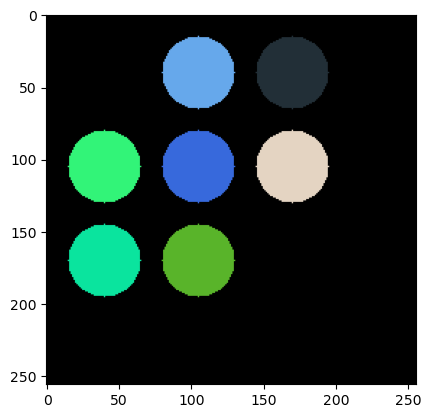

In [12]:
plt.imshow(image);

### b. Display r, g and b planes separately from the image in problem 1a. 
### - Convert this image to HSI (HSV) color space and display 3 different planes.

In [20]:
print(np.shape(image))

(256, 256, 3)


In [21]:
b,g,r = cv2.split(image)

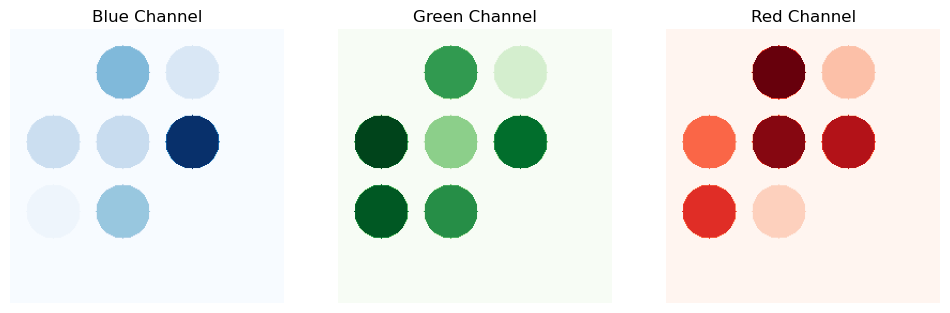

In [23]:
plt.figure(figsize=(12, 4));
plt.subplot(1,3,1)
plt.imshow(b,cmap='Blues');
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(g, cmap='Greens');
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(r, cmap='Reds');
plt.title('Red Channel')
plt.axis('off')
plt.show()

### c. Select the Hue image from part b and treat it as a grayscale image. Add “Salt and Pepper” noise to it and add random noise to this image (200 pixels at random locations are altered). 
### - Using a 5x5 Gaussian kernel and 5x5 averaging kernel to remove the noise, display the noisy as well as the two denoised images and compare the performanceof the two filters.

In [28]:
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(image_HSV)

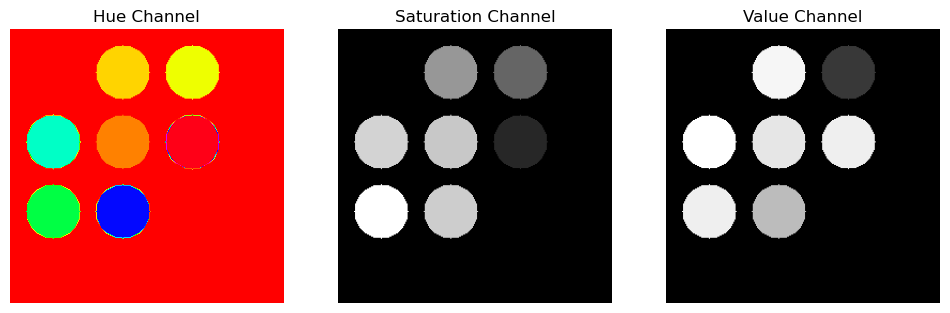

In [30]:
plt.figure(figsize=(12, 4));
plt.subplot(1,3,1)
plt.imshow(h,cmap='hsv');
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray');
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray');
plt.title('Value Channel')
plt.axis('off')
plt.show()

In [31]:
print(np.shape(h))

(256, 256)


In [34]:
print(h.dtype)

uint8


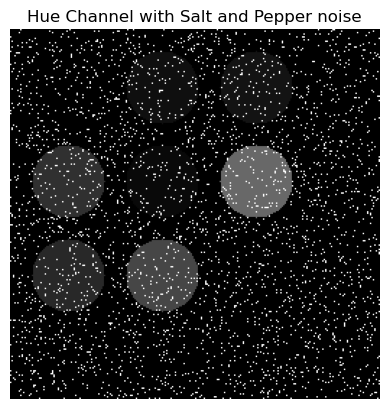

In [36]:
h_gray = h
# Adding salt and pepper noise:
noise_level = 0.05
SnP_noise = np.random.choice([0,255], size = h.shape, p=[1- noise_level, noise_level])
SnP_noise = SnP_noise.astype(h.dtype)
h_SnP = cv2.add(h_gray,SnP_noise)

plt.imshow(h_SnP,cmap='gray');
plt.title('Hue Channel with Salt and Pepper noise')
plt.axis('off')
plt.show()

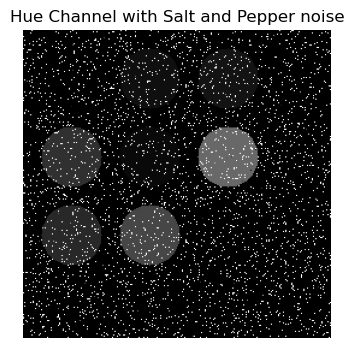

In [38]:
# Add random noise to the image
num_pixels = 200
rows, cols = h_SnP.shape
for _ in range(num_pixels):
    x = np.random.randint(0, rows)
    y = np.random.randint(0, cols)
    h_SnP[x, y] = np.random.randint(0, 256)

plt.figure(figsize=(12, 4));
plt.subplot(1,2,1)
plt.imshow(h_SnP,cmap='gray');
plt.title('Hue Channel with Salt and Pepper noise')
plt.axis('off')
plt.show()

In [40]:
# 5x5 Gaussian Filter
# Define the kernels
gaussian_kernel = np.array([[1, 4, 7, 4, 1],
                             [4, 16, 26, 16, 4],
                             [7, 26, 41, 26, 7],
                             [4, 16, 26, 16, 4],
                             [1, 4, 7, 4, 1]]) / 273.0

averaging_kernel = np.ones((5, 5), np.float32) / 25.0

# Apply the filters to the noisy image
denoised_gaussian = cv2.filter2D(h_SnP, -1, gaussian_kernel)
denoised_average = cv2.filter2D(h_SnP, -1, averaging_kernel)

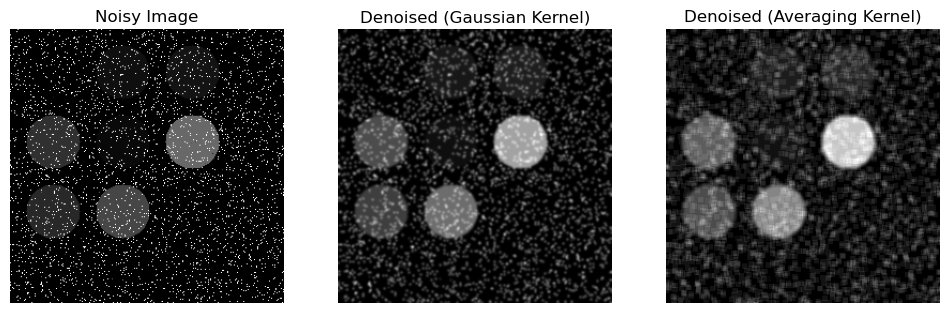

In [42]:
# Display the images
plt.figure(figsize=(12, 4))

# Noisy image
plt.subplot(1, 3, 1)
plt.imshow(h_SnP, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Denoised with Gaussian kernel
plt.subplot(1, 3, 2)
plt.imshow(denoised_gaussian, cmap='gray')
plt.title('Denoised (Gaussian Kernel)')
plt.axis('off')

# Denoised with Averaging kernel
plt.subplot(1, 3, 3)
plt.imshow(denoised_average, cmap='gray')
plt.title('Denoised (Averaging Kernel)')
plt.axis('off')

plt.show()

#### The Gaussian Kernel is sharper than the Averaging filter. 

### d. Edge detection. Convert the colored image created in 1a into a grayscale image. Apply the following kernels for edge detection to find the outlines of the circles in the figure. Which method gives the best result and why? How can you improve the performance of other edge detectors?

- Sobel
- Prewitt
- Canny

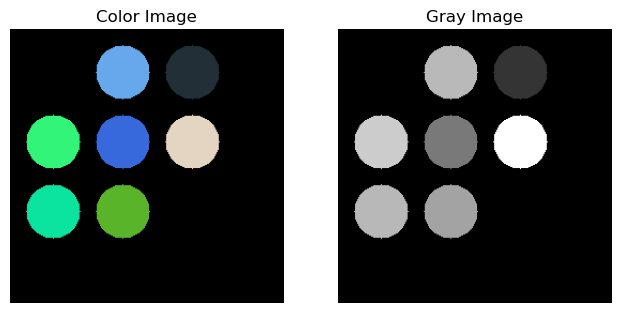

In [52]:
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Display the images
plt.figure(figsize=(12, 4))

# Noisy image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Color Image')
plt.axis('off')

# Denoised with Gaussian kernel
plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()